# Import all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Read the dataset

In [ ]:
data=pd.read_csv("StudentsPerformance.csv")

# data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## categorical variables:Gender,race/ethnicity,parental level of education,lunch,test preperation course
## numerical variables:math score,reading score,writing score

# Total no. of rows and columns

In [ ]:
print(data.shape)

(1000, 8)


# First five records

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Last five records

In [ ]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# DESCRIPTIVE STATISTICS

In [ ]:
data.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

# No of unique elements present in categorical(object) column

In [ ]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

# No of missing data

In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Check duplicates

In [ ]:
data.duplicated().sum()

0

## We dont have any duplicates or missing values ,so the code provides the good data checking

In [ ]:
print("Categories in 'gender' variable:  ",end=" ")
print(data["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(data["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(data["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(data["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(data["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [ ]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != "object"]
categorical_features = [feature for feature in data.columns if data[feature].dtype == "object"]

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
x=data['gender'].value_counts()
x

female    518
male      482
Name: gender, dtype: int64

## Impact of gender on students performance

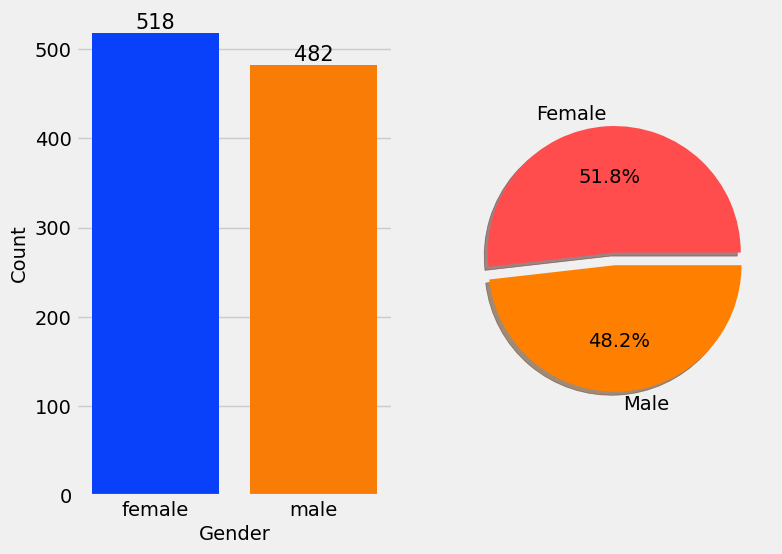

In [ ]:
f,ax=plt.subplots(1,2,figsize=(8,6))


# Create a countplot of the 'gender' column and add labels to the bars
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a pie chart of the 'gender' column and add labels to the slices
plt.pie(x=data['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})

# Display the plot
plt.show()

## Gender has balanced data where female students are 518(51.8%) and male students are 482(48.2%)

# Comparision of parental education

<ipython-input-600-f42b28634943>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data["parental level of education"], palette = 'Blues')


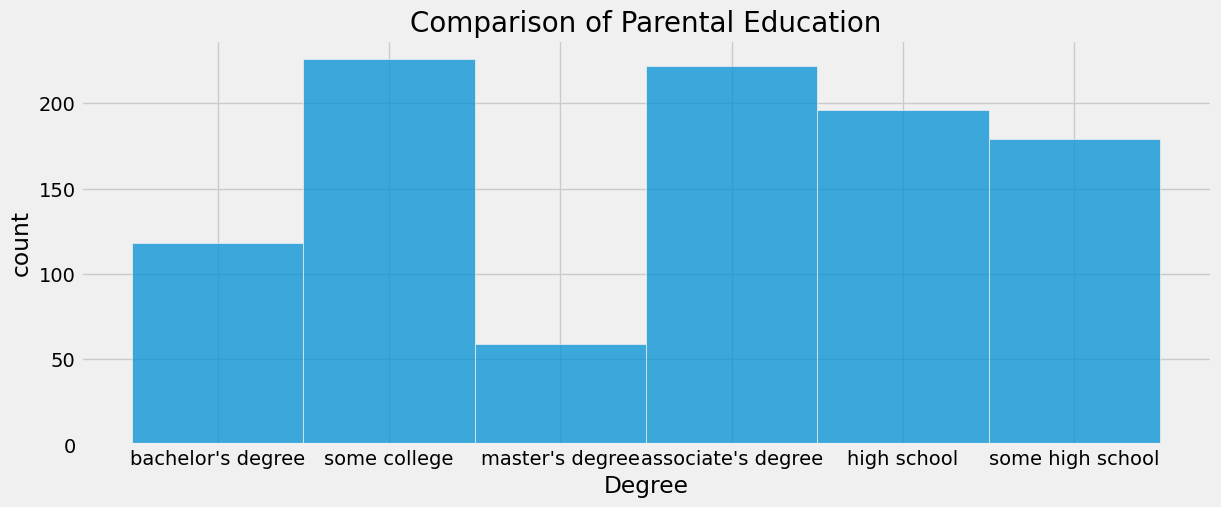

In [ ]:
plt.rcParams['figure.figsize'] = (13, 5)
plt.style.use('fivethirtyeight')
sns.histplot(data["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

## So here we can see most of the parents are from college
## second highest is,most of the parent are from associate's degree

<ipython-input-601-51bb349c0bc3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,5))


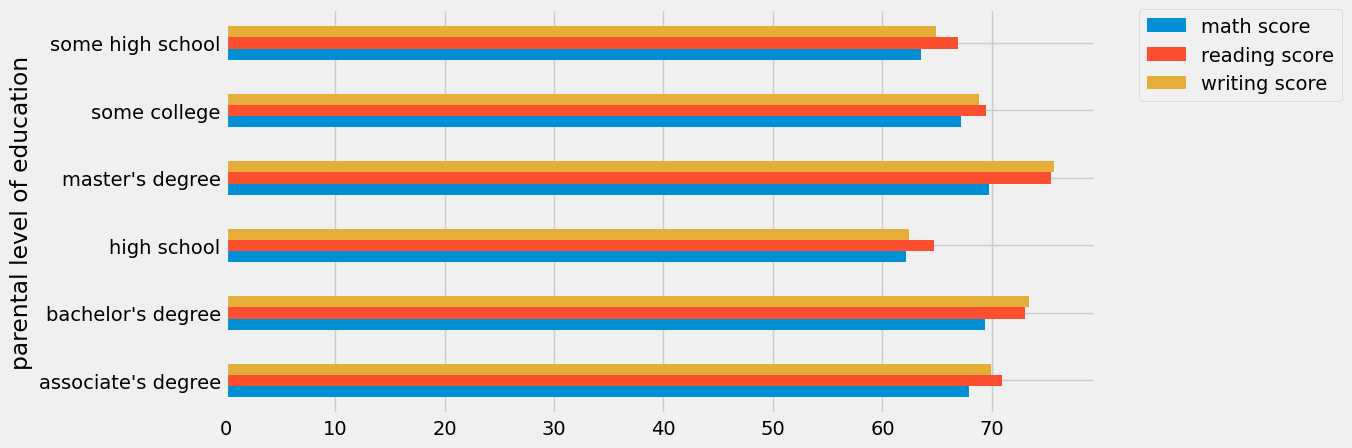

In [ ]:
data.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## here the score of student whose parental level of education bachelor's degree and master's degree is more when compared to other qualifications

(-1.25, 1.25, -1.25, 1.25)

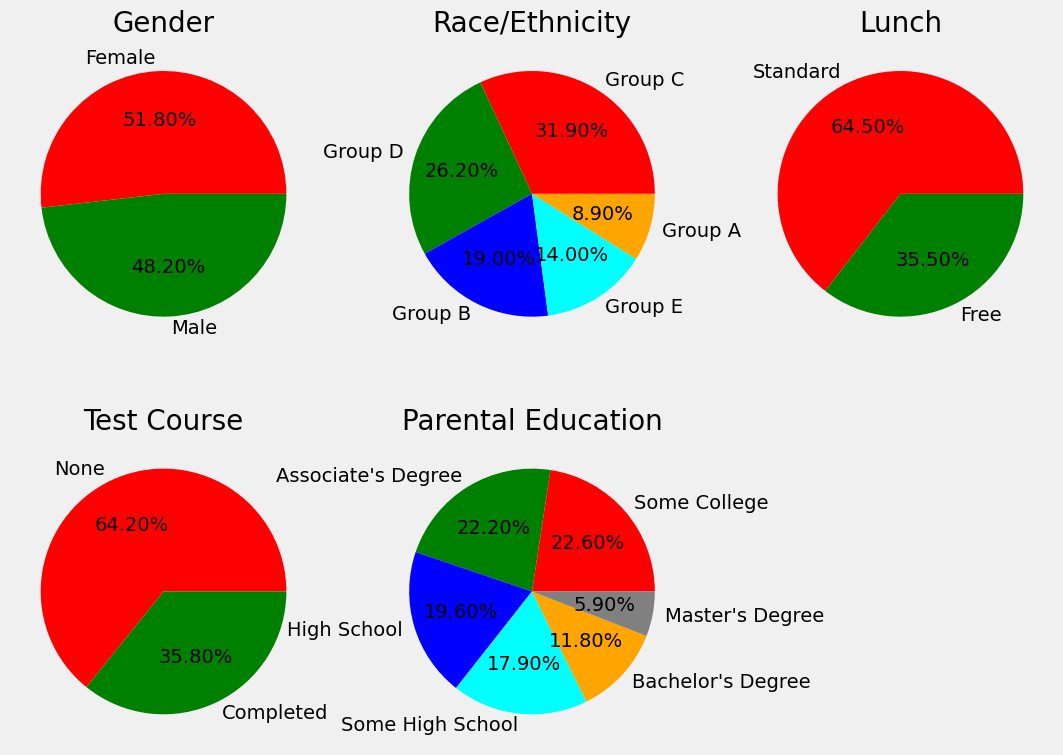

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

## 1)number of male and female students are almost equal
## 2)number of students is higher in group c
## 3)number of standard student is greater
## 4)number of students not enrolled in test course is more
## 5)The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degree”.

## comparision of race/ethnicity

Text(0.5, 1.0, 'comparision of race/ethnicity')

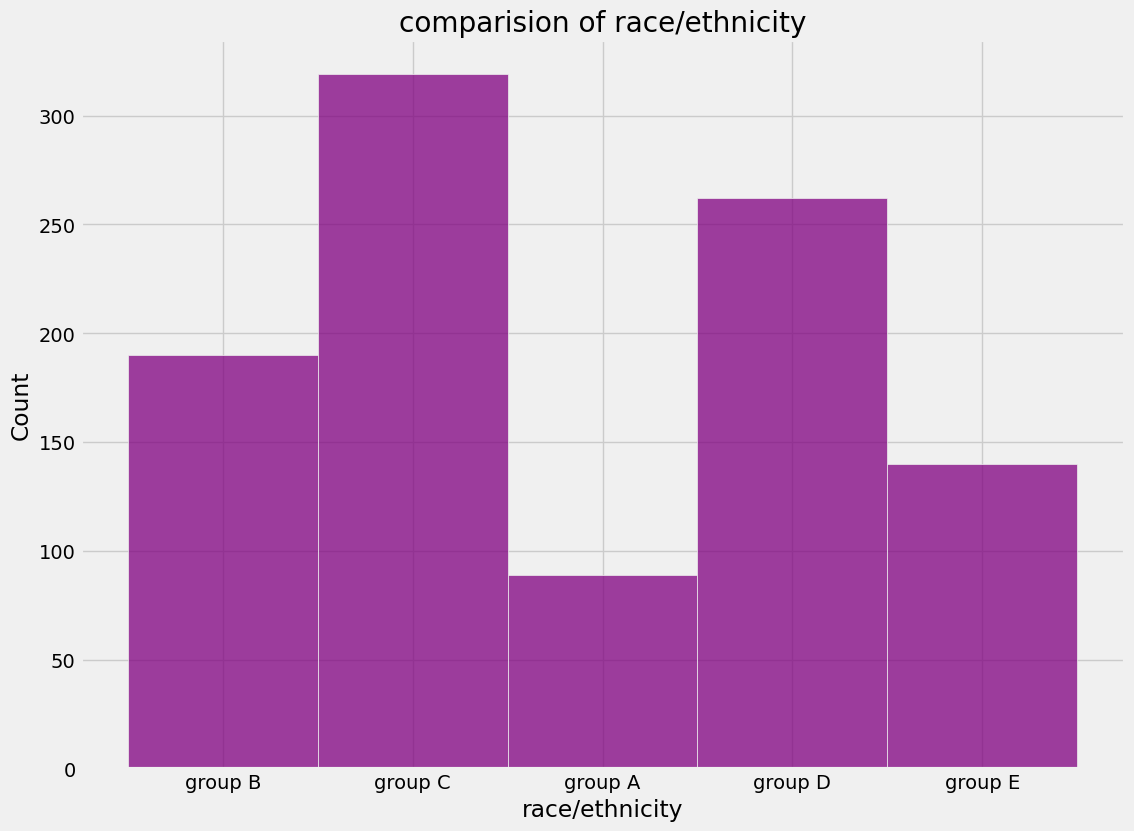

In [ ]:
sns.histplot(data["race/ethnicity"],color='purple')
plt.rcParams['figure.figsize'] = (1,1)
plt.title("comparision of race/ethnicity")

## Students from group C are more compared to other groups

# Comparing all other attributes with math score

## comparing mathscore with reading score

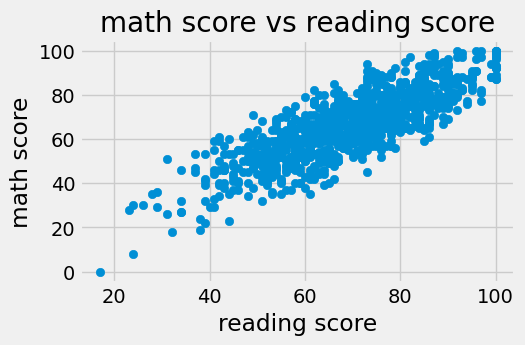

In [ ]:
plt.rcParams['figure.figsize'] = (5,3)
x=data["reading score"]
y=data["math score"]
plt.title("math score vs reading score")
plt.xlabel("reading score")
plt.ylabel("math score")
plt.scatter(x,y)

## comparing math score with writing score

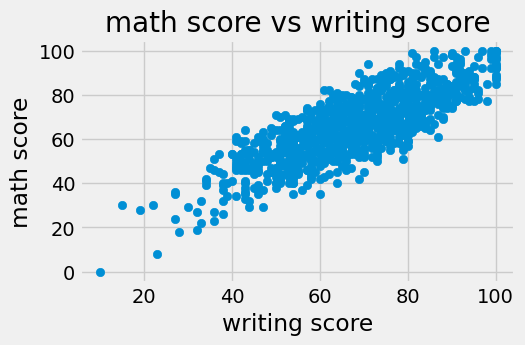

In [ ]:
plt.rcParams['figure.figsize'] = (5,3)
x=data["writing score"]
y=data["math score"]
plt.title("math score vs writing score")
plt.xlabel("writing score")
plt.ylabel("math score")
plt.scatter(x,y)

## comparing test preperation course with reading score

[]

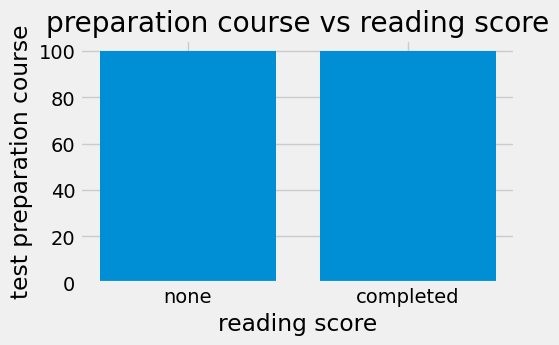

In [ ]:
plt.rcParams['figure.figsize'] = (5,3)
x=data["test preparation course"]
y=data["reading score"]
plt.title("preparation course vs reading score")
plt.xlabel("reading score")
plt.ylabel("test preparation course")
plt.bar(x,y)
plt.plot()

## here the students who have not enrolled to course and who have enrolled to course have same level of reading score

## comparing test preperation course with reading score

[]

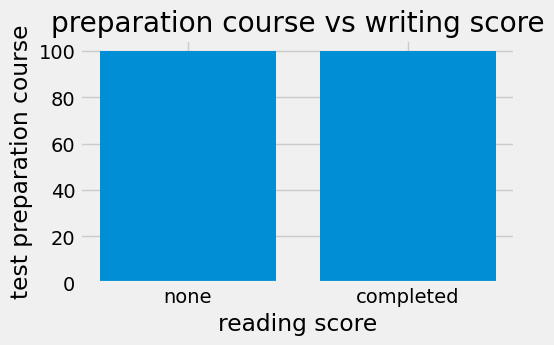

In [ ]:
plt.rcParams['figure.figsize'] = (5,3)
x=data["test preparation course"]
y=data["writing score"]
plt.title("preparation course vs writing score")
plt.xlabel("reading score")
plt.rcParams['figure.figsize'] = (15, 9)
plt.ylabel("test preparation course")
plt.bar(x,y)
plt.plot()

## here the students ho have enrolled to the course and who havenot enrolled to the course have same level of writing score

<ipython-input-608-ba2dbf4e5c61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

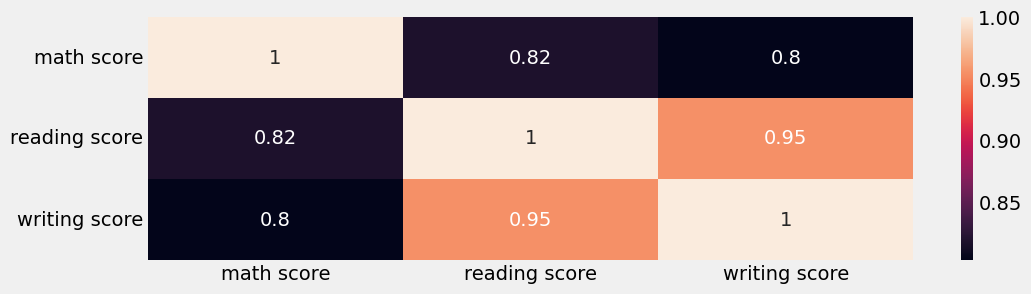

In [ ]:
plt.figure(figsize=[11,3])
sns.heatmap(data.corr(),annot=True)

## Lets check effect of test prepeartion course on Students performance

In [ ]:
data[['test preparation course','gender','math score','writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

# Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])
data["race/ethnicity"] = le.fit_transform(data["race/ethnicity"])
data["parental level of education"] = le.fit_transform(data["parental level of education"])
data["lunch"] = le.fit_transform(data["lunch"])
data["test preparation course"] = le.fit_transform(data["test preparation course"])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [ ]:
data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


# Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Split the dataset

This separation of the dependent variable(y) and independent variables(X) is one the most important so we will use the math score as a dependent variable. Because so many students lack in math subjects ,almost 60% to 70% of students in classes 7-10 students are fear of math subjects that’s why I am choosing the math score as a dependent score.

It will be useful to improve the percentage of math scores and increase the grad f students and also remove fear in math.

In [ ]:
x=data.drop(columns="math score",axis=1)
y=data["math score"]

In [ ]:
print(x)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  reading score  writing score  
0                          1             72             74  
1                          0             90             88  
2           

In [ ]:
print(y)

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# **LinearRegression**

In [ ]:
lr=LinearRegression(fit_intercept= True)
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("test score:",lr.score(x_test,y_test))
print("train score:",lr.score(x_train,y_train))

test score: 0.852818307561346
train score: 0.8700895857870928


In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([64.39647645, 75.18769977, 48.93618198, 67.80169661, 70.46961802,
       73.53721832, 66.3295744 , 49.2536697 , 87.99815828, 43.55740889,
       45.01380137, 59.20524353, 82.41207824, 85.91068117, 43.9918917 ,
       33.4065905 , 55.95503271, 78.39876877, 48.51828504, 80.76056103,
       55.62648338, 48.47628399, 70.83353246, 63.75349901, 49.32861038,
       65.51818204, 61.53997959, 48.71123327, 57.33073005, 78.8066367 ,
       72.88587492, 90.73122797, 83.9516927 , 53.69995918, 44.69068584,
       88.06872782, 93.94803289, 58.26447348, 68.76334993, 69.684519  ,
       73.02930279, 58.54350885, 72.20007714, 69.41539274, 74.24233968,
       51.23492954, 82.63159315, 54.1142742 , 78.7083436 , 52.82217679,
       42.78449335, 62.91853696, 41.93122101, 62.17094435, 40.83207183,
       67.24938626, 47.64443364, 68.23225276, 80.82606154, 54.94546034,
       71.37860486, 71.57803459, 43.93192429, 77.97832132, 69.61634053,
       66.70944145, 77.15106617, 47.85369035, 59.78130232, 53.60

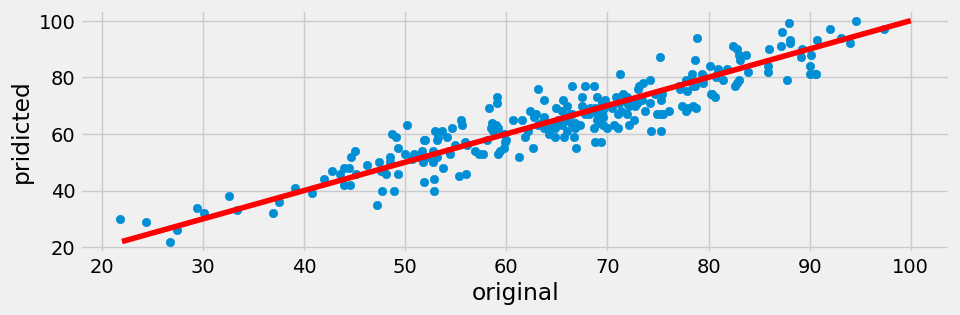

In [ ]:
plt.figure(figsize=[10,3])
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('original')
plt.ylabel('pridicted')
plt.show()

In [ ]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_pred)
print("Total score using linear regression:",acc)

Total score using linear regression: 0.852818307561346



## Accuracy of Linear Regression

In [ ]:
result1=pd.DataFrame({'Algorithm':['LINEAR REGRESSION'],'Total score':acc})
results=result1[['Algorithm','Total score']]
results

,Algorithm,Total score
0,LINEAR REGRESSION,0.852818


# **KNearest Neighbors**

In [ ]:
knn=KNeighborsRegressor(n_neighbors =7)
knn

KNeighborsRegressor(n_neighbors=7)

In [ ]:
knn.fit(x_test,y_test)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
print("test score:",knn.score(x_test,y_test))
print("train score:",knn.score(x_train,y_train))

test score: 0.6869622923586018
train score: 0.6544858970873466


In [ ]:
y_pred2=knn.predict(x_test)
y_pred2

array([72.28571429, 74.42857143, 56.42857143, 62.28571429, 69.        ,
       67.57142857, 67.        , 46.57142857, 78.71428571, 34.71428571,
       53.85714286, 62.42857143, 75.85714286, 73.85714286, 58.42857143,
       46.42857143, 53.42857143, 76.57142857, 56.42857143, 71.57142857,
       60.85714286, 56.28571429, 66.42857143, 60.71428571, 52.        ,
       65.71428571, 57.71428571, 47.85714286, 64.        , 77.28571429,
       77.        , 80.57142857, 90.85714286, 56.        , 59.28571429,
       78.57142857, 91.57142857, 59.57142857, 66.14285714, 72.        ,
       63.28571429, 55.14285714, 62.57142857, 69.28571429, 73.        ,
       56.85714286, 77.28571429, 61.28571429, 80.57142857, 56.42857143,
       36.14285714, 58.57142857, 54.28571429, 62.28571429, 44.71428571,
       70.28571429, 56.14285714, 59.28571429, 73.71428571, 61.28571429,
       68.14285714, 72.28571429, 54.42857143, 69.        , 64.28571429,
       66.85714286, 67.85714286, 52.85714286, 67.        , 54.28

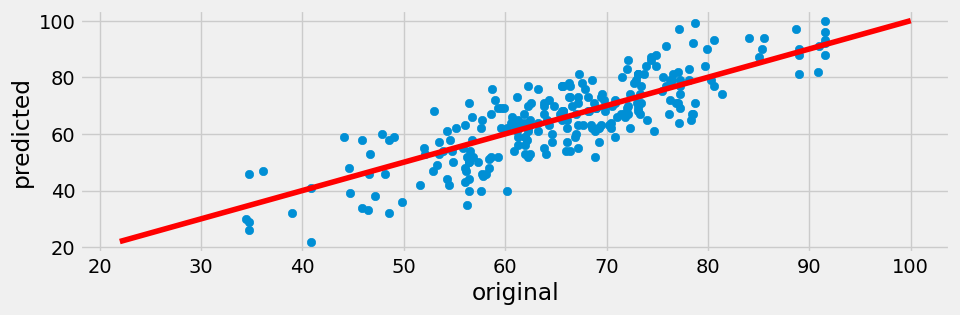

In [ ]:
plt.figure(figsize=[10,3])
plt.scatter(y_pred2,y_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('original')
plt.ylabel('predicted')
plt.show()

In [ ]:
acc=metrics.r2_score(y_test,y_pred2)
print("Total score using KNN:",acc)

Total score using KNN: 0.6869622923586018


## Accuracy of KNN

In [ ]:
result1=pd.DataFrame({'Algorithm':['KNN'],'Total Score':acc})
results=result1[['Algorithm','Total Score']]
results

,Algorithm,Total Score
0,KNN,0.686962


# **Support Vector Machine**

In [ ]:
svm=SVR(kernel = "rbf",degree= 3)
svm

SVR()

In [ ]:
svm.fit(x_train,y_train)

SVR()

In [ ]:
print("test score:",svm.score(x_test,y_test))
print("train score:",svm.score(x_train,y_train))

test score: 0.5997732759519268
train score: 0.6534904150561589


In [ ]:
y_pred=svm.predict(x_test)
y_pred

array([69.54360666, 69.28762472, 50.82339534, 61.58254954, 72.73891591,
       67.74172285, 68.57599733, 47.98807583, 77.94574019, 44.9264815 ,
       52.01256851, 67.16645086, 75.02781473, 74.9591653 , 56.84213879,
       47.58943784, 51.75171354, 80.8252058 , 55.66430774, 74.38607945,
       61.68679115, 57.49176126, 73.24085204, 58.23348107, 49.29921557,
       61.79699275, 55.83472346, 49.39769493, 65.87277074, 80.7492487 ,
       78.08595266, 79.29695922, 82.69647811, 60.05811454, 56.65405297,
       75.80555906, 85.54114753, 56.10003709, 73.69117018, 70.60531489,
       63.19497713, 55.54987273, 66.74244566, 73.81167846, 76.97996811,
       59.55938263, 81.04332525, 61.49029381, 78.83424041, 61.22731858,
       45.32662159, 60.11470441, 52.38201485, 55.96157508, 46.9165773 ,
       71.36368777, 55.78079697, 60.94320606, 71.59511335, 62.50298681,
       65.31882662, 74.56601737, 55.23031626, 69.94716543, 64.78361741,
       64.94760658, 67.88546088, 54.47120277, 67.13683608, 53.04

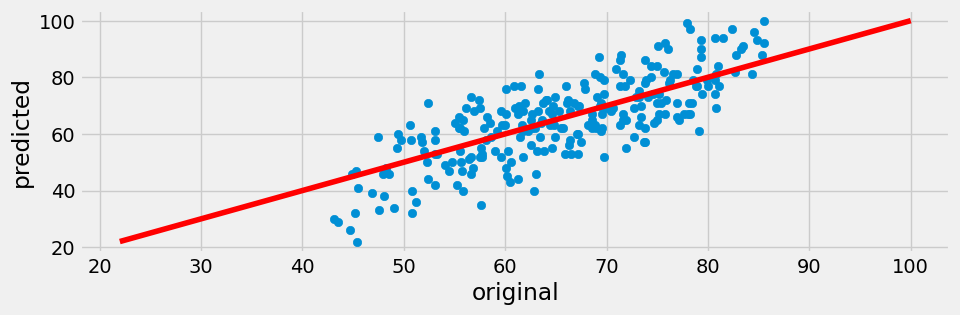

In [ ]:
plt.figure(figsize=[10,3])
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('original')
plt.ylabel('predicted')
plt.show()

In [ ]:
acc=metrics.r2_score(y_test,y_pred)
print("Total Score of SVR:",acc)

Total Score of SVR: 0.5997732759519268


## Accuracy of SVR

In [ ]:
result1=pd.DataFrame({'Algorithm':['SVR'],'Total Score':acc})
results=result1[['Algorithm','Total Score']]
results

,Algorithm,Total Score
0,SVR,0.599773


# **RANDOM FOREST REGRESSOR**

In [ ]:
rforest=RandomForestRegressor(n_estimators =256 ,)
rforest

RandomForestRegressor(n_estimators=256)

In [ ]:
rforest.fit(x_train,y_train)


RandomForestRegressor(n_estimators=256)

In [ ]:
print("Test score:",rforest.score(x_test,y_test))
print("Train score:",rforest.score(x_train,y_train))

Test score: 0.8369499389840047
Train score: 0.9773097245854323


In [ ]:
y_pred=rforest.predict(x_test)
y_pred

array([61.6171875 , 74.01171875, 47.71484375, 68.55859375, 71.609375  ,
       73.78125   , 63.453125  , 50.76953125, 91.2578125 , 38.05859375,
       44.76171875, 60.88671875, 80.6796875 , 85.296875  , 47.34765625,
       32.35546875, 52.1171875 , 78.578125  , 51.76171875, 81.5390625 ,
       54.171875  , 44.21875   , 75.08203125, 60.38671875, 48.30078125,
       66.26953125, 60.6171875 , 52.640625  , 59.65234375, 75.3828125 ,
       73.48046875, 88.8828125 , 86.390625  , 53.66796875, 45.33203125,
       87.875     , 90.18359375, 58.84375   , 66.3359375 , 67.3125    ,
       72.734375  , 59.80859375, 74.90234375, 68.69921875, 73.41015625,
       52.97265625, 80.0546875 , 55.46875   , 78.125     , 54.02734375,
       41.62109375, 60.09375   , 45.30078125, 63.76953125, 42.4765625 ,
       63.07682292, 47.86328125, 66.15234375, 80.8359375 , 55.96484375,
       71.1015625 , 69.0390625 , 45.44140625, 81.40234375, 69.87890625,
       69.1640625 , 75.75390625, 45.91015625, 60.99609375, 52.30

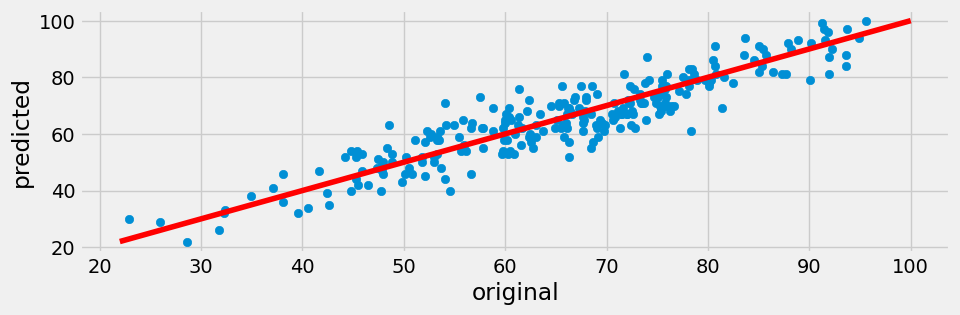

In [ ]:
plt.figure(figsize=[10,3])
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('original')
plt.ylabel('predicted')
plt.show()

In [ ]:
acc=metrics.r2_score(y_test,y_pred)
print("Total Score using RFR:", acc)

Total Score using RFR: 0.8369499389840047


## Accuracy of Random Forest Regression

In [ ]:
result1=pd.DataFrame({'Algorithm':['Random Forest'],'Total Score':acc})
results=result1[['Algorithm','Total Score']]
results

,Algorithm,Total Score
0,Random Forest,0.83695


# **Decision Tree Regressor**

In [ ]:
dtc=DecisionTreeRegressor(criterion="squared_error",max_depth=5)
dtc


DecisionTreeRegressor(max_depth=5)

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
print("Test score:",dtc.score(x_test,y_test))
print("Train score:",dtc.score(x_train,y_train))

Test score: 0.8126449302909956
Train score: 0.8564673723829733


In [ ]:
y_pred=dtc.predict(x_test)
y_pred

array([57.31578947, 76.95652174, 52.95294118, 70.03333333, 70.76190476,
       72.11111111, 63.375     , 52.95294118, 91.5       , 48.        ,
       47.55813953, 57.31578947, 82.58064516, 82.58064516, 47.55813953,
       39.4375    , 52.95294118, 82.2       , 47.55813953, 82.58064516,
       55.025     , 47.55813953, 70.76190476, 62.8372093 , 52.95294118,
       62.8372093 , 62.8372093 , 52.95294118, 57.31578947, 82.2       ,
       73.775     , 84.59090909, 82.2       , 47.55813953, 47.55813953,
       82.58064516, 94.27272727, 62.5       , 66.47619048, 63.375     ,
       70.03333333, 62.8372093 , 76.95652174, 66.47619048, 73.775     ,
       55.025     , 82.2       , 55.025     , 82.2       , 55.025     ,
       48.        , 62.8372093 , 47.55813953, 62.8372093 , 39.5       ,
       57.31578947, 47.55813953, 62.8372093 , 82.58064516, 55.025     ,
       72.11111111, 66.47619048, 47.55813953, 76.95652174, 72.11111111,
       72.11111111, 76.95652174, 47.55813953, 63.375     , 52.95

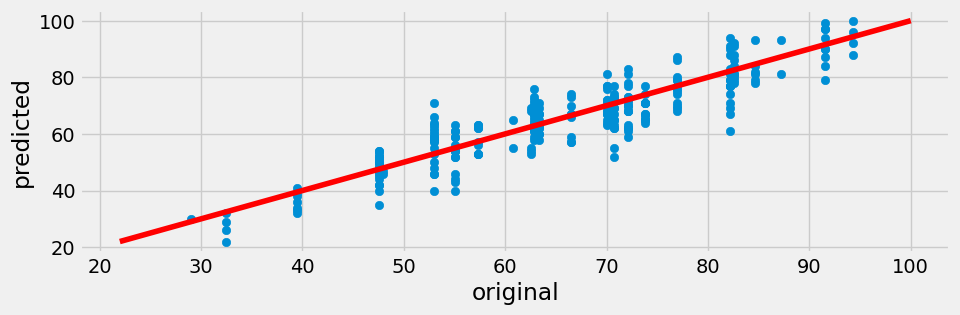

In [ ]:
plt.figure(figsize=[10,3])
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('original')
plt.ylabel('predicted')
plt.show()

In [ ]:
acc=metrics.r2_score(y_test,y_pred)
print("Total Score using DTR:",acc)

Total Score using DTR: 0.8126449302909956


## Accuracy of decision tree regressor

In [ ]:
result1=pd.DataFrame({'Algorithm':['Random Forest'],'Total Score':acc})
results=result1[['Algorithm','Total Score']]
results

,Algorithm,Total Score
0,Random Forest,0.812645


# **CONCLUSION**

Linear regression gives better accuracy compared to other regression problems.

Linear regression is the best fit for the problem

Linear regression provides an accuracy of 85%, giving out the most accurate results.